#  Projet Machine Learning

### Arthur Frachon - Jeanne Collot

## Sujet

## 1) Problématique 

## 2) Préparation des données

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Charger les fichiers CSV
x_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
x_test = pd.read_csv('X_test.csv', index_col=0)

# Fusionner les cibles avec les features pour exploration
train_data = pd.concat([x_train, y_train], axis=1)

# Vérification des structures des fichiers
print("Structure de nos fichiers : \n")
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("\n")

# Exploration initiale des données
print("Informations sur notre dataset : \n")
print(train_data.info())
print("\n --------------------------- \n Informations sur nos features : \n")
print(train_data.describe())

Structure de nos fichiers : 

X_train shape: (10605, 9)
y_train shape: (10605, 1)
X_test shape: (4942, 9)


Informations sur notre dataset : 

<class 'pandas.core.frame.DataFrame'>
Index: 10605 entries, 2022-01-01 02:00:00+01:00 to 2023-03-29 23:00:00+02:00
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   load_forecast                  9318 non-null   float64
 1   coal_power_available           10604 non-null  float64
 2   gas_power_available            10604 non-null  float64
 3   nucelear_power_available       10604 non-null  float64
 4   wind_power_forecasts_average   10581 non-null  float64
 5   solar_power_forecasts_average  10581 non-null  float64
 6   wind_power_forecasts_std       10581 non-null  float64
 7   solar_power_forecasts_std      10581 non-null  float64
 8   predicted_spot_price           1846 non-null   float64
 9   spot_id_delta                  10605 non-nul

## 3 Traitement et création de nouvelles features (A completer)

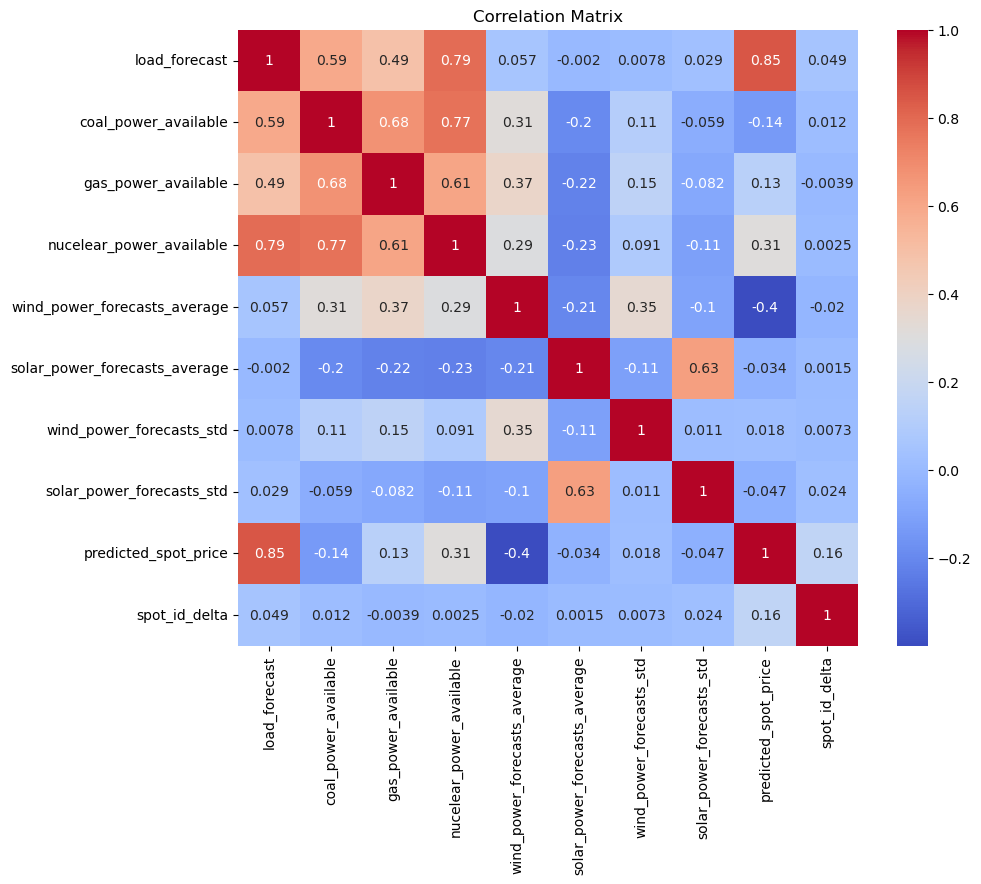

In [3]:
# Vérifier la corrélation entre les features et la cible
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

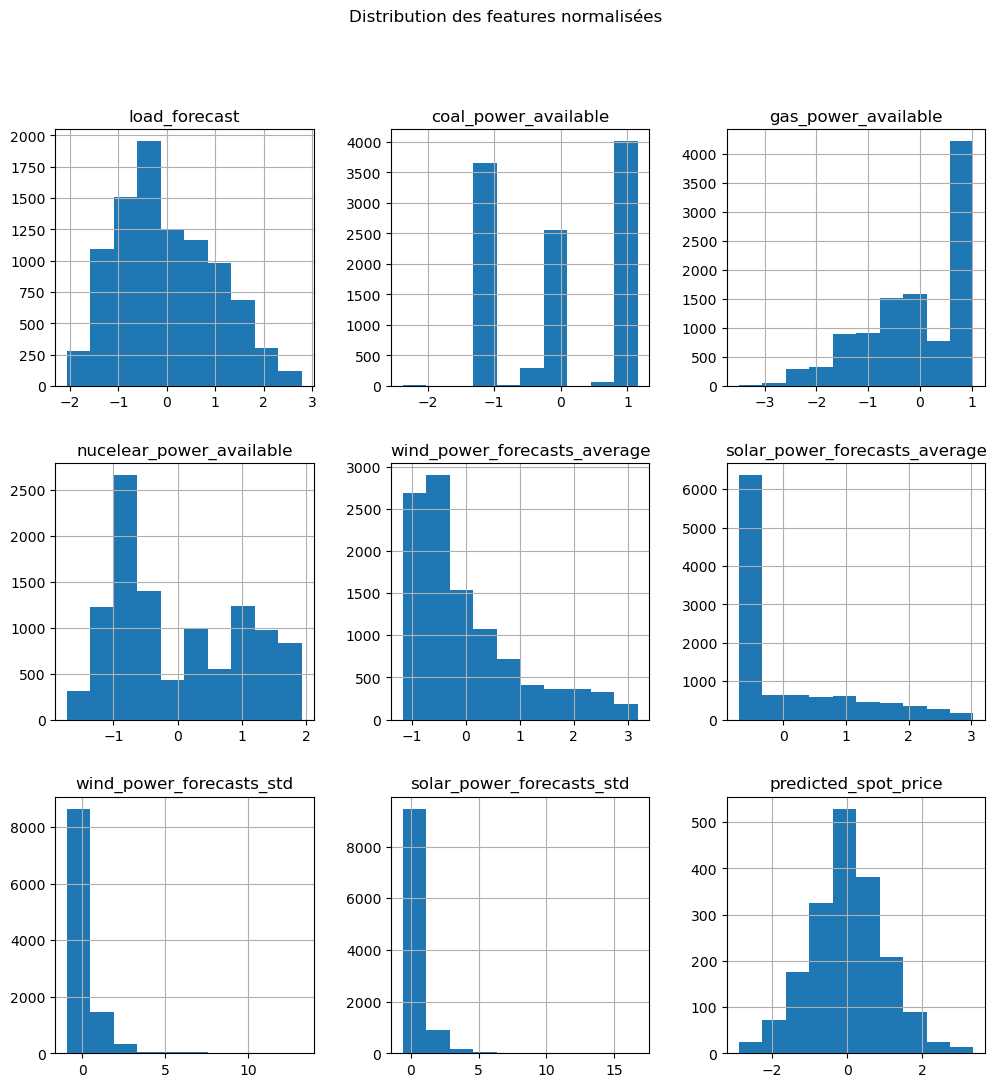

In [4]:
# Normalisation des features numériques
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

# Vérifier les distributions des features
x_train_scaled.hist(figsize=(12, 12))
plt.suptitle("Distribution des features normalisées")
plt.show()

In [5]:
x_train_scaled.fillna(x_train_scaled.mean(),inplace=True)
print(x_train_scaled.info())
print("\n ----------------- \n")
#print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   load_forecast                  10605 non-null  float64
 1   coal_power_available           10605 non-null  float64
 2   gas_power_available            10605 non-null  float64
 3   nucelear_power_available       10605 non-null  float64
 4   wind_power_forecasts_average   10605 non-null  float64
 5   solar_power_forecasts_average  10605 non-null  float64
 6   wind_power_forecasts_std       10605 non-null  float64
 7   solar_power_forecasts_std      10605 non-null  float64
 8   predicted_spot_price           10605 non-null  float64
dtypes: float64(9)
memory usage: 745.8 KB
None

 ----------------- 



## 4) Benchmark

In [6]:
from sklearn.linear_model import LogisticRegression

# Transformation de la cible en binaire (positif/négatif)
y_train_binary = (y_train['spot_id_delta'] > 0).astype(int)

# Modèle baseline : Régression Logistique
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(x_train_scaled, y_train_binary)

# Prédictions et évaluation
y_pred_baseline = baseline_model.predict(x_train_scaled)
baseline_accuracy = accuracy_score(y_train_binary, y_pred_baseline)

# Weighted Accuracy
def weighted_accuracy(y_true, y_pred, weight):
    correct_predictions = (np.sign(y_true) == np.sign(y_pred)).astype(int)
    return np.sum(correct_predictions * np.abs(weight)) / np.sum(np.abs(weight))

weighted_acc_baseline = weighted_accuracy(y_train['spot_id_delta'], y_pred_baseline, y_train['spot_id_delta'])

print("Baseline Accuracy:", baseline_accuracy)
print("Baseline Weighted Accuracy:", weighted_acc_baseline)
print("Classification Report (Baseline):")
print(classification_report(y_train_binary, y_pred_baseline))

Baseline Accuracy: 0.5200377180575201
Baseline Weighted Accuracy: 0.326304699502016
Classification Report (Baseline):
              precision    recall  f1-score   support

           0       0.52      0.49      0.50      5285
           1       0.52      0.55      0.54      5320

    accuracy                           0.52     10605
   macro avg       0.52      0.52      0.52     10605
weighted avg       0.52      0.52      0.52     10605



## 5) Modèle non supervisé

In [7]:
x_train_scaled.info()
print(x_train_scaled.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10605 entries, 0 to 10604
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   load_forecast                  10605 non-null  float64
 1   coal_power_available           10605 non-null  float64
 2   gas_power_available            10605 non-null  float64
 3   nucelear_power_available       10605 non-null  float64
 4   wind_power_forecasts_average   10605 non-null  float64
 5   solar_power_forecasts_average  10605 non-null  float64
 6   wind_power_forecasts_std       10605 non-null  float64
 7   solar_power_forecasts_std      10605 non-null  float64
 8   predicted_spot_price           10605 non-null  float64
dtypes: float64(9)
memory usage: 745.8 KB
       load_forecast  coal_power_available  gas_power_available  \
count   1.060500e+04          1.060500e+04         1.060500e+04   
mean   -6.323717e-16          6.078474e-15         2.433

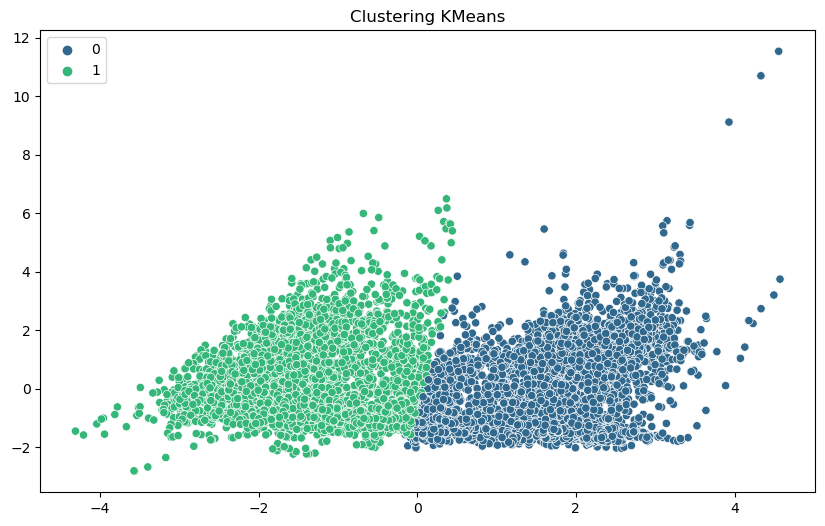

In [8]:
# Modèle de clustering : KMeans

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# PCA pour la réduction de dimensions
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_train_scaled)
clusters = kmeans.predict(x_train_scaled)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=clusters, palette='viridis')
plt.title("Clustering KMeans")
plt.show()

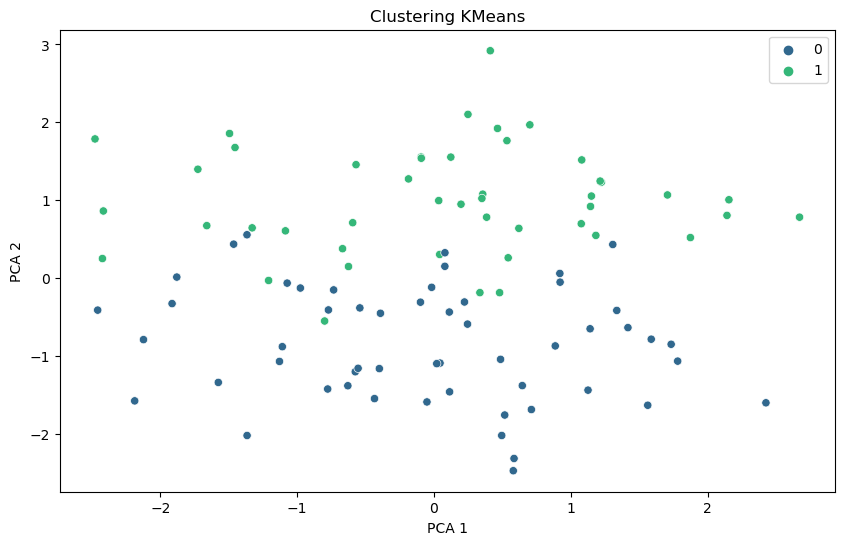

In [9]:
#Tests sur un jeu de données fictifs

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de données fictives pour tester
import numpy as np
np.random.seed(42)
x_train_t = np.random.rand(100, 9)  # Simule un dataset de 100 échantillons avec 9 features

# Normalisation des données
scaler_t = StandardScaler()
x_train_scaled_t= scaler_t.fit_transform(x_train_t)

# Réduction de dimensions avec PCA
pca = PCA(n_components=2)
x_train_pca_t = pca.fit_transform(x_train_scaled_t)

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(x_train_scaled_t)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train_pca_t[:, 0], y=x_train_pca_t[:, 1], hue=clusters, palette='viridis')
plt.title("Clustering KMeans")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


## 6) Modèle supervisé

In [10]:
# Modèles SVM et RF

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train_binary)
y_pred_rf = rf_model.predict(x_train_scaled)
weighted_acc_rf = weighted_accuracy(y_train['spot_id_delta'], y_pred_rf, y_train['spot_id_delta'])

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(x_train_scaled, y_train_binary)
y_pred_svm = svm_model.predict(x_train_scaled)
weighted_acc_svm = weighted_accuracy(y_train['spot_id_delta'], y_pred_svm, y_train['spot_id_delta'])

# Comparaison des performances
print("Random Forest Weighted Accuracy:", weighted_acc_rf)
print("SVM Weighted Accuracy:", weighted_acc_svm)

Random Forest Weighted Accuracy: 0.5240327077778565
SVM Weighted Accuracy: 0.3585091644995038


## 7) Intérprétation des modèles

In [ ]:
import shap
from lime.lime_tabular import LimeTabularExplainer

# SHAP pour le modèle Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(x_train_scaled)

# Résumé graphique SHAP
shap.summary_plot(shap_values_rf[1], x_train_scaled)

# LIME pour le modèle Random Forest
lime_explainer_rf = LimeTabularExplainer(x_train_scaled.values, training_labels=y_train_binary.values, feature_names=x_train.columns, discretize_continuous=True)
lime_exp_rf = lime_explainer_rf.explain_instance(x_train_scaled.iloc[0].values, rf_model.predict_proba, num_features=10)
lime_exp_rf.show_in_notebook()

## 8) Modèle de Deep Learning

In [13]:
pip install tensorflow

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\arthu\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Création du modèle de Deep Learning
dl_model = Sequential([
    Dense(64, activation='relu', input_dim=x_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
dl_model.fit(x_train_scaled, y_train_binary, epochs=20, batch_size=32, validation_split=0.2)

# Prédiction et évaluation
y_pred_dl = (dl_model.predict(x_train_scaled) > 0.5).astype(int)
weighted_acc_dl = weighted_accuracy(y_train['spot_id_delta'], y_pred_dl, y_train['spot_id_delta'])

print("Deep Learning Model Weighted Accuracy:", weighted_acc_dl)

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xe

SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception

## 9) Comparaison des résultats

In [15]:
# Comparaison des modèles
model_performance = {
    'Baseline (Logistic Regression)': weighted_acc_baseline,
    'Random Forest': weighted_acc_rf,
    'SVM': weighted_acc_svm,
    #'Deep Learning': weighted_acc_dl
}

for model, score in model_performance.items():
    print(f"{model}: {score:.4f}")

Baseline (Logistic Regression): 0.3263
Random Forest: 0.5240
SVM: 0.3585


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as ts 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Layer,Flatten
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
x_test = pd.read_csv(r'X_test.csv')
x_train = pd.read_csv(r'X_train.csv').set_index('DELIVERY_START')
y_train = pd.read_csv(r'y_train.csv').set_index('DELIVERY_START').reset_index(drop=True)

In [11]:
print(x_train.columns)

Index(['load_forecast', 'coal_power_available', 'gas_power_available',
       'nucelear_power_available', 'wind_power_forecasts_average',
       'solar_power_forecasts_average', 'wind_power_forecasts_std',
       'solar_power_forecasts_std', 'predicted_spot_price'],
      dtype='object')


In [15]:
y_train

,spot_id_delta
0,-36.874770
1,-12.643588
2,-1.950193
3,1.938272
4,0.199907
...,...
10600,6.029303
10601,13.576177
10602,17.478945
10603,17.559407


## Réseau de neurone

#### ACP pour retirer la corrélation des données

In [19]:
# Normalisation des données
scaler = StandardScaler()
x_train_sc = pd.DataFrame(scaler.fit_transform(x_train))

# ACP
acp = PCA(n_components=7)
acp.fit(x_train_sc.bfill())

# composantes principales
variables = acp.components_

# variance expliquée
variance = acp.explained_variance_ratio_

## Pour projecter en 2D
#pca = PCA(n_components=2)
#pca.fit(x_train_sc)
#projected_data = pca.transform(x_train_sc)

In [20]:
projected_data = pd.DataFrame(acp.transform(x_train_sc.bfill()))

In [21]:
variance.sum()

0.9611233667589226

Pour 1 dimension  : variance = 0.39634916658232644
Pour 2 dimensions : variance = 0.5919497230726987
Pour 3 dimensions : variance = 0.7408700697519439
Pour 4 dimensions : variance = 0.8225340105133809
Pour 5 dimensions : variance = 0.8778602780707683
Pour 6 dimensions : variance = 0.9212372685732764
Pour 7 dimensions : variance = 0.9611233667589231
Pour 8 dimensions : variance = 0.983275067292191
Pour 6 dimensions : variance = 0.9999999999999998

<Axes: >

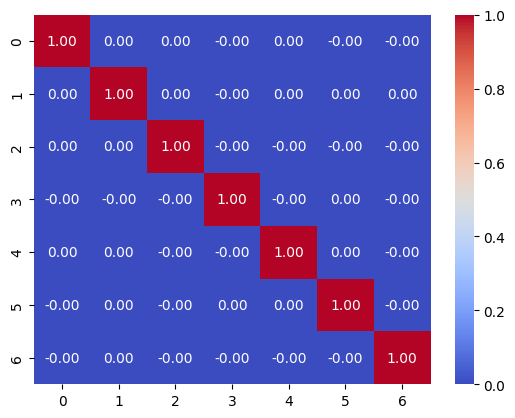

In [22]:
sns.heatmap(projected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


<Axes: >

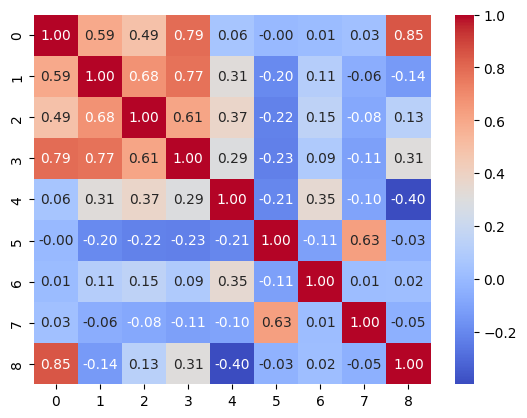

In [23]:
sns.heatmap(x_train_sc.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [24]:
projected_data

,0,1,2,3,4,5,6
0,-1.063261,-0.477373,-0.932839,0.064379,0.219429,0.769783,-0.772734
1,-0.950692,-0.539827,-0.952212,-0.119501,0.295834,0.817955,-0.827734
2,-0.896962,-0.564839,-0.995990,-0.269014,0.313004,0.842275,-0.842326
3,-0.888195,-0.575169,-1.006175,-0.348808,0.300509,0.848707,-0.839791
4,-0.919674,-0.570241,-1.005126,-0.403608,0.249918,0.840028,-0.815276
...,...,...,...,...,...,...,...
10600,-1.608355,-0.635949,0.958367,-0.232219,0.585079,0.117704,-0.582189
10601,-1.675589,-0.774538,0.496077,-0.731765,0.413538,0.043704,-0.248805
10602,-1.670295,-0.894270,0.466710,-1.016962,0.354828,-0.028773,-0.127102
10603,-1.730396,-0.959172,0.720511,-0.973987,0.316390,-0.032137,-0.153805


In [25]:
y_train

,spot_id_delta
0,-36.874770
1,-12.643588
2,-1.950193
3,1.938272
4,0.199907
...,...
10600,6.029303
10601,13.576177
10602,17.478945
10603,17.559407


#### Réseau 

In [37]:
model = Sequential([
LSTM(48, activation='elu', input_shape=(7,1)),
Dense(64),
Dense(64),
Dense(1)])




model.compile(optimizer='adam',
              loss='mean_squared_error')

model.fit(projected_data, y_train, epochs=10,validation_split=0.4, batch_size=3)


Epoch 1/10
2121/2121 [==============================] - 13s 5ms/step - loss: 1305.0658 - val_loss: 513.9402
Epoch 2/10
2121/2121 [==============================] - 12s 6ms/step - loss: 1299.5953 - val_loss: 518.2072
Epoch 3/10
2121/2121 [==============================] - 12s 6ms/step - loss: 1286.2677 - val_loss: 559.3334
Epoch 4/10
2121/2121 [==============================] - 12s 6ms/step - loss: 1276.3184 - val_loss: 563.9987
Epoch 5/10
2121/2121 [==============================] - 14s 7ms/step - loss: 1267.9337 - val_loss: 540.5235
Epoch 6/10
2121/2121 [==============================] - 13s 6ms/step - loss: 1266.9778 - val_loss: 561.5283
Epoch 7/10
2121/2121 [==============================] - 13s 6ms/step - loss: 1261.0850 - val_loss: 566.0239
Epoch 8/10
2121/2121 [==============================] - 13s 6ms/step - loss: 1255.5010 - val_loss: 572.5208
Epoch 9/10
2121/2121 [==============================] - 12s 6ms/step - loss: 1247.7732 - val_loss: 566.0974
Epoch 10/10
2121/2121 [=====

332/332 [==============================] - 1s 2ms/step


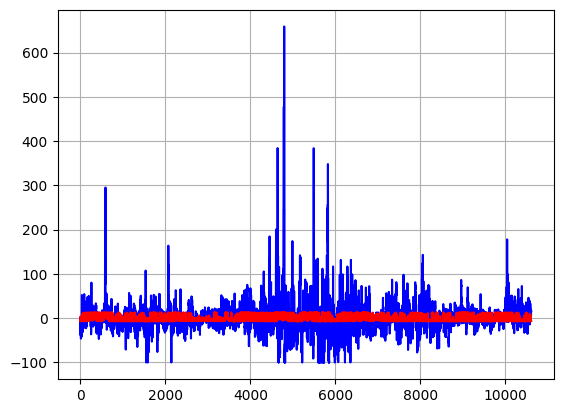

In [36]:
y_pred = model.predict(projected_data)
y_train_1 = y_train


# Display the result
plt.plot(y_train_1,'b-')
plt.plot(y_pred,"r-")
plt.grid()
plt.show()

## Regression Tree

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

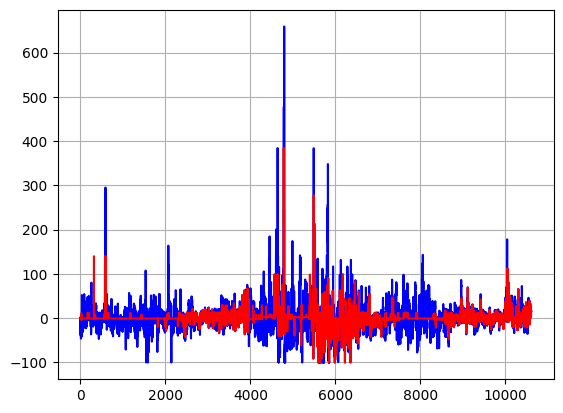

Mean Squared Error: 649.5582230160501


In [29]:
# Create a decision tree regressor
x_train_ = x_train[:6000]
x_test_ = x_train[6000:]
y_train_ = y_train[:6000]
y_test_ = y_train[6000:]
tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(x_train, y_train)

# Predict on the testing data
y_pred = tree_regressor.predict(x_train)

# Display the result
plt.plot(y_train,'b-')
plt.plot(y_pred,"r-")
plt.grid()
plt.show()

# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)

## Regression Logistique

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Créer un modèle de régression logistique
model = LogisticRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(x_train, y_train)

# Prédire les étiquettes des données de test
y_pred = model.predict(x_train)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_train, y_pred)
print("Exactitude du modèle :", accuracy)

# Tracer les données et la frontière de décision
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


plt.title('Logistic Regression Decision Boundary')
plt.show()


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values